In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 加载数据
trainData = pd.read_csv('./data/train.csv')
testData = pd.read_csv('./data/test.csv')

In [3]:
trainData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
testData.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## 训练集数据整体描述

In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


数据集中共有12个字段:
* PassengerId：乘客编号
* Survived：乘客是否存活
* Pclass：乘客所在的船舱等级
* Name：乘客姓名
* Sex：乘客性别
* Age：乘客年龄
* SibSp：乘客的兄弟姐妹和配偶数量
* Parch：乘客的父母与子女数量
* Ticket：票的编号
* Fare：票价
* Cabin：船舱号
* Embarked：乘客登船码头   

共有891位乘客的数据信息。其中277位乘客的年龄数据缺失，2位乘客的登船码头数据缺失，687位乘客的船舱数据缺失。

In [6]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从各个数据描述中可以看出：
* 存活率略高于38%（mean）
* 3等舱人数超过了一半（50%）,2等舱次之，1等舱不足25%(25%）
* 大部分年龄处于20-40岁之间等

## 通过图形分析各属性与存活之间的关联

In [9]:
# 中文配置
plt.rcParams['font.sans-serif'] = ['simhei'] # 用来正常显示中文标签
plt.rcParams['font.family']='sans-serif' 
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [50]:
# 根据col1的属性值统计col2的分布
def twoColCounts(df,col1,col2,rename= {0:'死亡', 1:'存活'}):
    uniqueVal = df[col1].unique()
    valueCounts = dict([(val,(df[df[col1] == val][col2]).value_counts() ) for val in uniqueVal])
    hist = pd.DataFrame(valueCounts)
    hist.rename(columns=rename, inplace = True)
    return hist
    

### 船舱等级与存活之间的关系

Text(0,0.5,'人数')

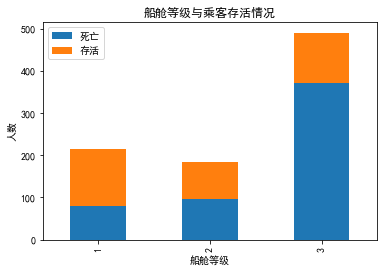

In [54]:
pClass = twoColCounts(trainData,'Survived','Pclass')
pClass.plot(kind = 'bar', stacked = True)
plt.title('船舱等级与乘客存活情况')
plt.xlabel('船舱等级')
plt.ylabel('人数')

In [ ]:
1等舱存活率 > 2等舱存活率 > 3等舱存活率    
不同等级的船舱位于轮船的不同位置，对逃生有很大影响

### 性别与存活之间的关系

Text(0,0.5,'人数')

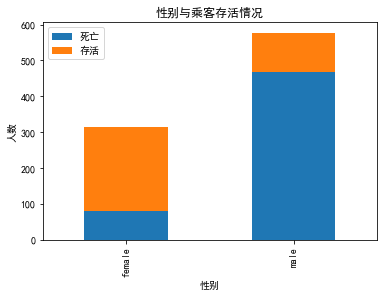

In [52]:
sex = twoColCounts(trainData,'Survived','Sex')
sex.plot(kind = 'bar', stacked = True)
plt.title('性别与乘客存活情况')
plt.xlabel('性别')
plt.ylabel('人数')

女性存活率要远远大于男性存活率，因此性别是一个很重要的特征

### 始发地与乘客存活情况

Text(0,0.5,'人数')

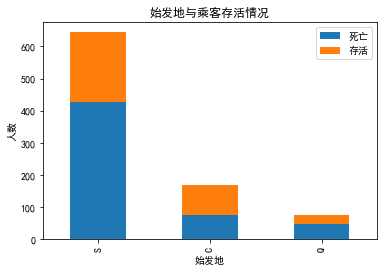

In [53]:
embarked = twoColCounts(trainData,'Survived','Embarked')
embarked.plot(kind = 'bar', stacked = True)
plt.title('始发地与乘客存活情况')
plt.xlabel('始发地')
plt.ylabel('人数')

出发地与乘客存活率无明显的关联关系

### 年龄与存活之间的关系

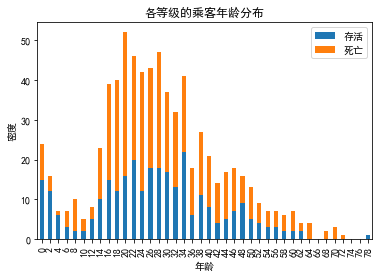

In [99]:
regions = range(0,82,2)
ageSurvived = pd.cut(trainData.Age[trainData.Survived == 1],regions,right = True).value_counts()
ageUnsurvived = pd.cut(trainData.Age[trainData.Survived == 0],regions,right = True).value_counts()
age = pd.DataFrame({'存活':ageSurvived,'死亡':ageUnsurvived})
age.index = age.index.categories[:].left
age.plot(kind = 'bar', stacked = True)
plt.xlabel('年龄')
plt.ylabel('密度') 
plt.title('各等级的乘客年龄分布')
plt.legend(('存活','死亡'),loc='best') 

儿童的存活率高于成年人